In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer ,QuantileTransformer
from numpy.random import seed ,randn
from numpy import exp

In [2]:
seed(87)
data = randn(1000)
data = exp(data)
X_reshape_data = data.reshape(-1,1)
X = X_reshape_data
X

array([[ 1.45117783],
       [ 1.13645702],
       [ 1.69420272],
       [ 0.69020067],
       [ 5.7571551 ],
       [ 1.46085355],
       [ 1.20570414],
       [ 1.9746153 ],
       [ 0.29390154],
       [ 3.42167284],
       [ 0.61655902],
       [ 0.32794093],
       [ 4.16792708],
       [ 0.58573603],
       [ 0.40166898],
       [ 0.40110229],
       [ 0.16056318],
       [ 0.37031029],
       [ 0.27932134],
       [ 0.30894397],
       [ 0.44668237],
       [ 2.09584354],
       [ 0.74100204],
       [ 1.09232641],
       [ 1.81905683],
       [ 0.88914882],
       [ 0.79470455],
       [ 4.86074842],
       [ 0.2619377 ],
       [ 0.43545845],
       [ 1.56740264],
       [ 0.36256226],
       [ 2.8245477 ],
       [ 2.26736784],
       [ 1.18672601],
       [ 1.87442027],
       [ 0.37775721],
       [ 1.93487651],
       [ 1.37851492],
       [ 1.41515007],
       [ 0.87273075],
       [ 4.06348357],
       [ 0.24605176],
       [ 0.62571812],
       [ 0.33520741],
       [ 0

In [3]:
def qq_plot_and_p_value(data,ax,title):
    stats.probplot(data,dist ='norm',plot=ax)
    ax.get_lines()[1].set_color('res')
    ax.set_title(title,fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')
    _,p_value = stats.shapiro(data)
    return p_value

In [4]:
transformers = {
    'yeo-johnson' : PowerTransformer(method='yeo-johnson'),
    'Box-Cox' : PowerTransformer(method='box-cox'),
    'Quantile-normal' : QuantileTransformer(output_distribution='normal'),
    'Quantile-uniform' : QuantileTransformer(output_distribution='uniform')
}

Transformation yeo-johnson could not be applied 'res' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value
Transformation Quantile-normal could not be applied 'res' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value
Transformation Quantile-uniform could not be applied 'res' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; str

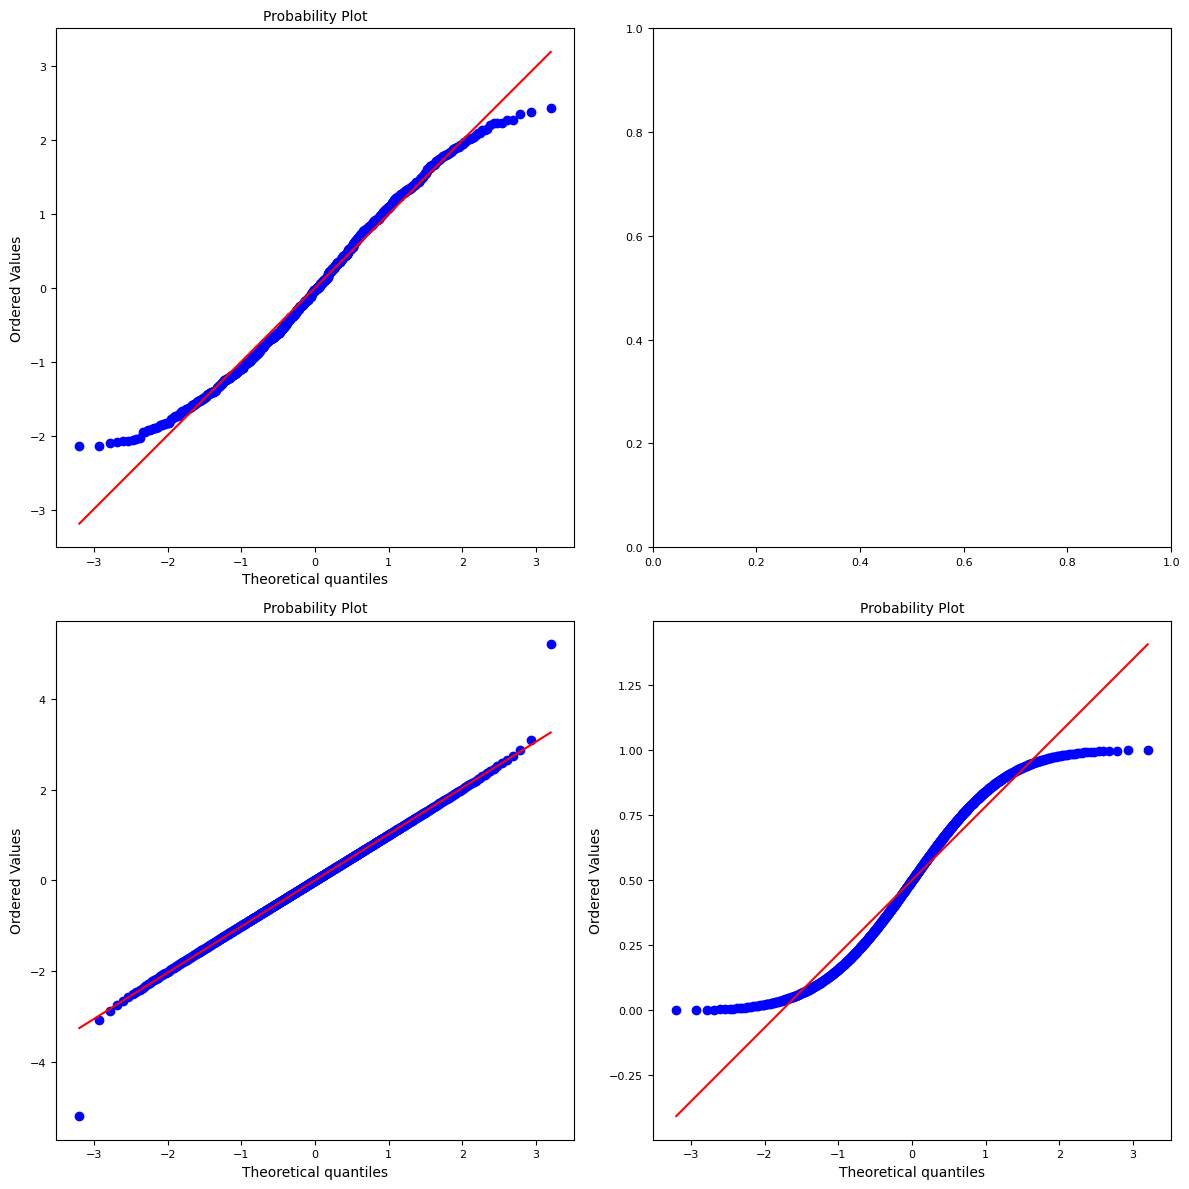

In [5]:
fig ,axs = plt.subplots(2,2,figsize = (12,12))

axs = axs.flatten()
p_values = []

for i ,(name,transformer) in enumerate(transformers.items()):
    try:
        if name == 'Box-Cox':
            X_transformed = transformer.fit_transform(X + 1)
        else :
            X_transformed = transformer.fit_transform(X)
            X_transformed_flat = X_transformed.flatten()
            p_value = qq_plot_and_p_value(X_transformed_flat,axs[i],name)
            p_values.append((name,p_value))
    except Exception as error:
        print(f'Transformation {name} could not be applied {error}')

for ax in axs :
        ax.title.set_size(10)
        ax.xaxis.set_tick_params(labelsize=8)
        ax.yaxis.set_tick_params(labelsize=8)

plt.tight_layout()
plt.show()

for name ,p_value in p_values:
    print(f'Transformation :{name} ,Shapeiro-wilk p-value :{p_value:.4f}')

In [6]:
from pandas import read_csv
data = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')
print(data.columns)
data['my_feature'] = data['0.0200'].apply(lambda X: True if X > 0.02 else False)
print(data['my_feature'])

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')
0       True
1       True
2      False
3       True
4       True
       ...  
202    False
203     True
204     True
205     True
206     True
Name: my_feature, Length: 207, dtype: bool


[ 0.37237552  0.12791554  0.52721226 -0.3707729   1.75044345  0.37902089
  0.18706375  0.68037359 -1.22451047  1.23012957]
<class 'numpy.ndarray'>


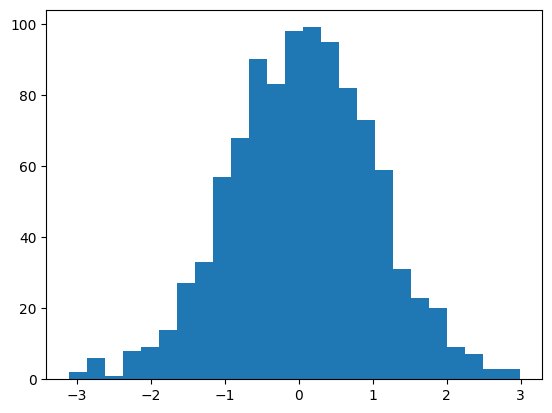

[[ 0.37237552]
 [ 0.12791554]
 [ 0.52721226]
 [-0.3707729 ]
 [ 1.75044345]
 [ 0.37902089]
 [ 0.18706375]
 [ 0.68037359]
 [-1.22451047]
 [ 1.23012957]
 [-0.48360123]
 [-1.11492177]
 [ 1.42741881]
 [-0.53488605]
 [-0.91212697]
 [-0.9135388 ]
 [-1.82906774]
 [-0.99341399]
 [-1.27539239]
 [-1.17459533]
 [-0.80590751]
 [ 0.73995612]
 [-0.2997519 ]
 [ 0.08830975]
 [ 0.59831814]
 [-0.11749066]
 [-0.22978487]
 [ 1.58119242]
 [-1.33964861]
 [-0.83135589]
 [ 0.44941988]
 [-1.01455906]
 [ 1.03834825]
 [ 0.81861962]
 [ 0.17119826]
 [ 0.62829942]
 [-0.97350359]
 [ 0.66004351]
 [ 0.32100677]
 [ 0.34723558]
 [-0.13612819]
 [ 1.40204063]
 [-1.40221335]
 [-0.46885529]
 [-1.09300581]
 [-0.94536516]
 [-0.38484469]
 [-0.60706528]
 [-0.06357265]
 [-0.62474915]
 [ 1.95512624]
 [-1.4808109 ]
 [-0.31093832]
 [ 2.45652051]
 [ 0.50988869]
 [-1.15738562]
 [ 0.68063063]
 [-2.05880025]
 [ 0.62706241]
 [-1.45984468]
 [-0.05173008]
 [-0.93616726]
 [-0.25410036]
 [-0.016352  ]
 [-0.53737388]
 [-0.0111527 ]
 [-0.05005

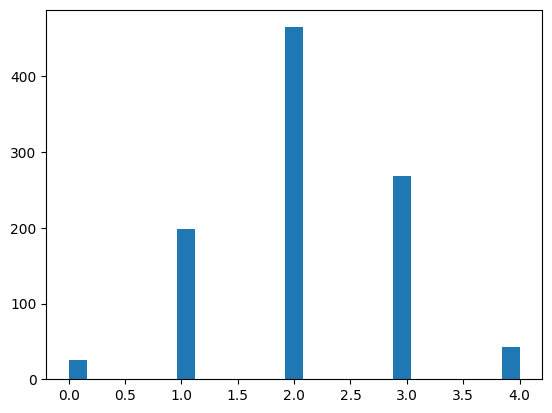

In [7]:
from numpy.random import randn
from sklearn.preprocessing import KBinsDiscretizer
from matplotlib import pyplot as plt

seed(87)
data = randn(1000)

print(data[:10])
print(type(data))

plt.hist(data,bins=25)
plt.show()

data = data.reshape((-1,1))
print(data)

kbins = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
data_trans = kbins.fit_transform(data)
print('10 data :\n',data_trans[:10,:])

plt.hist(data_trans,bins=25)
plt.show()

In [8]:
from numpy import std,mean
from pandas import read_csv
from sklearn.model_selection import cross_val_score ,RepeatedStratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,KBinsDiscretizer

Accuracy :81.706 (0.081)


(array([1., 0., 0., 3., 1., 4., 9., 5., 4., 3.]),
 array([0.57142857, 0.60952381, 0.64761905, 0.68571429, 0.72380952,
        0.76190476, 0.8       , 0.83809524, 0.87619048, 0.91428571,
        0.95238095]),
 <BarContainer object of 10 artists>)

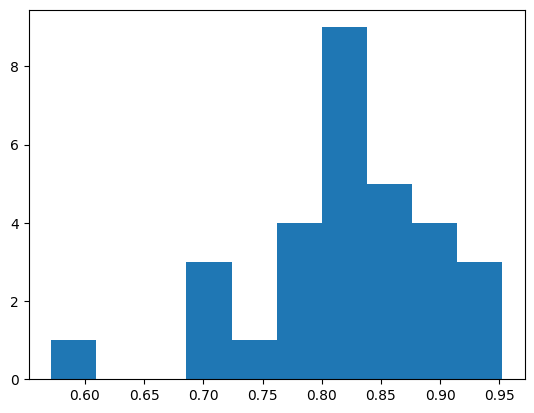

In [9]:
df = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')

data = df.values
X ,y = data[:,:-1],data[:,-1]

X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

model = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=87)
n_score = cross_val_score(model,X,y,cv=cv,scoring='accuracy',n_jobs=-1)

print('Accuracy :%.3f (%.3f)' % (mean(n_score)*100,std(n_score)))

from matplotlib import pyplot
pyplot.hist(n_score)

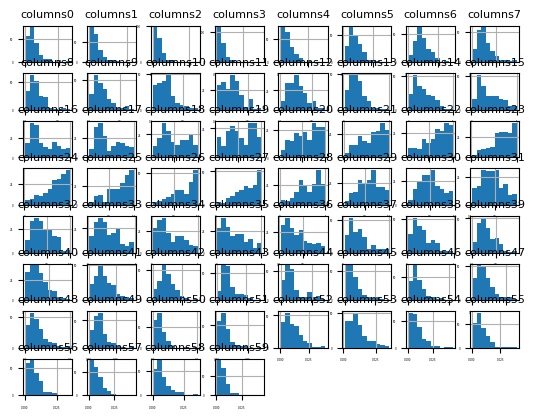

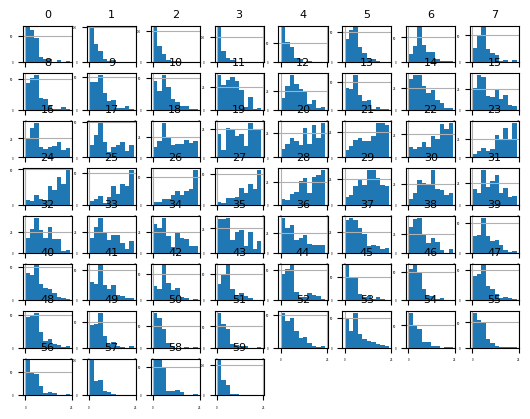

In [10]:
k_bins = KBinsDiscretizer(strategy='uniform',n_bins=25,encode='ordinal') # uniform -> چولکی تغییر نکرده

dataframe = df.copy() 

new_columns = []
name_columns = 'columns'

for i in range(df.shape[1]):
    new_name = name_columns + str(i)
    new_columns.append(new_name)
df.columns = new_columns


ax = df.hist(xlabelsize=2, ylabelsize=2)
for axes in ax.flatten():
    axes.title.set_size(8)  

data = dataframe.values[:,:-1]
data_trans = k_bins.fit_transform(data)

from pandas import DataFrame

dataset = DataFrame(data_trans)

ax = dataset.hist(xlabelsize=2, ylabelsize=2)
for axes in ax.flatten():
    axes.title.set_size(8)  

Accuracy : 83.627 (0.066)


(array([2., 0., 6., 2., 4., 2., 4., 4., 4., 2.]),
 array([0.71428571, 0.73809524, 0.76190476, 0.78571429, 0.80952381,
        0.83333333, 0.85714286, 0.88095238, 0.9047619 , 0.92857143,
        0.95238095]),
 <BarContainer object of 10 artists>)

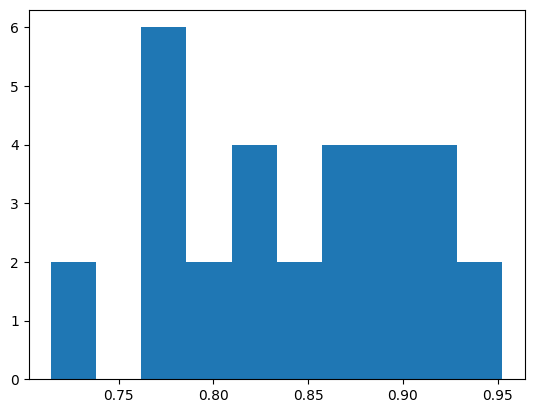

In [11]:
from numpy import mean ,std
from pandas import read_csv 
from sklearn.model_selection import cross_val_score ,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import KBinsDiscretizer ,LabelEncoder
from sklearn.pipeline import Pipeline

df = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')
data = df.values

X ,y = data[:,:-1] ,data[:,-1]

X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

model = KNeighborsClassifier()
k_bins = KBinsDiscretizer(strategy='uniform',n_bins=25,encode='ordinal')

pipline = Pipeline(steps=[('transform',k_bins),('model',model)])
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=87)

n_score = cross_val_score(pipline,X,y,cv=cv,scoring='accuracy',n_jobs=-1)
print('Accuracy : %.3f (%.3f)' % (mean(n_score) * 100 ,std(n_score)))

from matplotlib import pyplot
pyplot.hist(n_score)

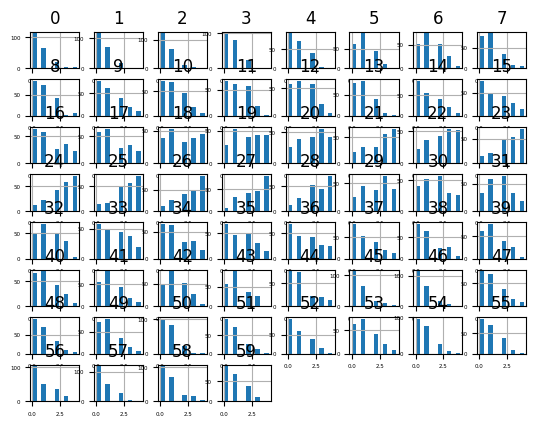

In [ ]:
import matplotlib.pyplot as plt
from pandas import read_csv ,DataFrame
from sklearn.preprocessing import KBinsDiscretizer 

df = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')
data = df.values[:,:-1]

trans = KBinsDiscretizer(strategy='kmeans',n_bins=5,encode='ordinal')
data = trans.fit_transform(data)
dataset = DataFrame(data)

dataset.hist(xlabelsize=4,ylabelsize=4)
plt.show()

accuracy : 83.556 (0.077)


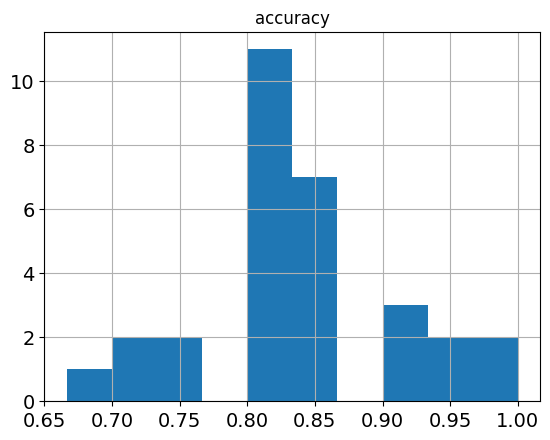

In [ ]:
from numpy import mean ,std
from pandas import read_csv ,DataFrame
from sklearn.model_selection import cross_val_score ,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder ,KBinsDiscretizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

df = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')
data = df.values

X ,y = data[:,:-1] ,data[:,-1]

X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

trans = KBinsDiscretizer(strategy='kmeans' ,n_bins=5,encode='onehot')
model = KNeighborsClassifier()

pipline = Pipeline(steps =[('transformer' ,trans) ,('model' ,model)])
cv = RepeatedStratifiedKFold(n_splits=10 ,n_repeats=3 ,random_state=87)

n_score = cross_val_score(pipline ,X ,y ,cv=cv ,n_jobs=-1 ,scoring='accuracy')
print('accuracy : %.3f (%.3f)' % (mean(n_score) * 100 ,std(n_score)))

DataFrame(n_score).hist(xlabelsize=14,ylabelsize=14)
plt.title('accuracy')
plt.show()

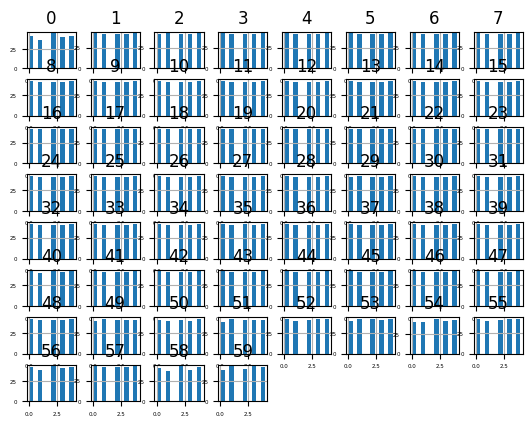

In [16]:
import matplotlib.pyplot as plt
from pandas import read_csv ,DataFrame
from sklearn.preprocessing import KBinsDiscretizer 

df = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')
data = df.values[:,:-1]

trans = KBinsDiscretizer(strategy='quantile',n_bins =5 ,encode='ordinal')
data = trans.fit_transform(data)
dataset = DataFrame(data)

dataset.hist(xlabelsize=4,ylabelsize=4)
plt.show()

accuracy : 85.040 (0.077)


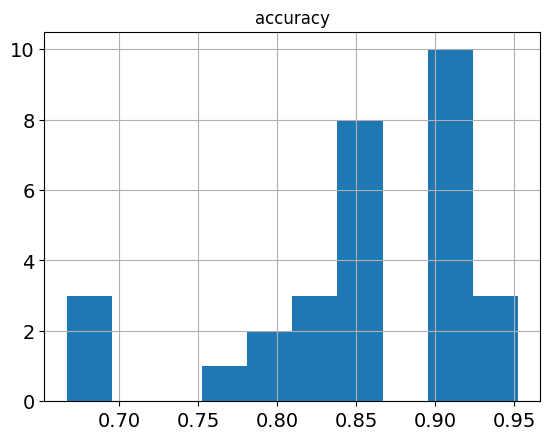

In [15]:
df = read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')
data = df.values

X ,y = data[:,:-1] ,data[:,-1]

X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

trans = KBinsDiscretizer(strategy='quantile' ,n_bins=5,encode='onehot')
model = KNeighborsClassifier()

pipline = Pipeline(steps =[('transformer' ,trans) ,('model' ,model)])
cv = RepeatedStratifiedKFold(n_splits=10 ,n_repeats=3 ,random_state=87)

n_score = cross_val_score(pipline ,X ,y ,cv=cv ,n_jobs=-1 ,scoring='accuracy')
print('accuracy : %.3f (%.3f)' % (mean(n_score) * 100 ,std(n_score)))

DataFrame(n_score).hist(xlabelsize=14,ylabelsize=14)
plt.title('accuracy')
plt.show()

>2  0.8503968253968254 0.07717147062260071
>3  0.8503968253968254 0.07717147062260071
>4  0.8503968253968254 0.07717147062260071
>5  0.8503968253968254 0.07717147062260071
>6  0.8503968253968254 0.07717147062260071
>7  0.8503968253968254 0.07717147062260071
>8  0.8503968253968254 0.07717147062260071
>9  0.8503968253968254 0.07717147062260071
>10  0.8503968253968254 0.07717147062260071


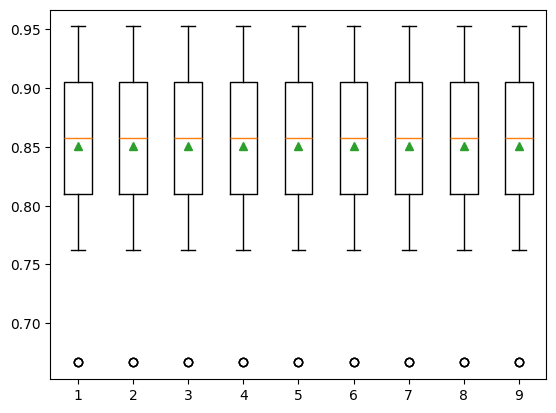

In [17]:
from numpy import mean ,std
from pandas import read_csv ,DataFrame
from sklearn.model_selection import cross_val_score ,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder ,KBinsDiscretizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def get_data():
    read_csv(r'C:\Users\ok\Desktop\pro\python\CSV dataset\sonar.csv')
    data = df.values
    X ,y = data[:,:-1] ,data[:,-1]
    X = X.astype('float32')
    y = LabelEncoder().fit_transform(y.astype('str'))
    return X ,y
def get_models():
    models = dict()
    for i in range(2,11):
        trans = KBinsDiscretizer(strategy='quantile' ,n_bins=i,encode='onehot')
        model = KNeighborsClassifier()
        models[str(i)] = Pipeline(steps =[('transformer' ,trans) ,('model' ,model)])
    return models
def evaluate_model(model ,X ,y):
    cv = RepeatedStratifiedKFold(n_splits=10 ,n_repeats=3 ,random_state=87)
    n_score = cross_val_score(pipline ,X ,y ,cv=cv ,n_jobs=-1 ,scoring='accuracy')
    return n_score

X ,y = get_data()
model = get_models()

result = []
names = []
for name ,model in model.items():
    score = evaluate_model(model,X,y)
    result.append(score)
    names.append(name)
    print(f'>{name}  {mean(score)} {std(score)}')

pyplot.boxplot(result ,label=names ,showmeans=True)
pyplot.show()